<h1>Gap-filling using random forest (2005, 2008, 2009, 2016)</h1>
- for these four years the MDS gap-filling produced unrealistic results due to long data gaps

# Imports

In [8]:
from pathlib import Path
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
from diive.core.io.files import save_parquet, load_parquet
from diive.pkgs.gapfilling.randomforest_ts import RandomForestTS

# Settings

In [9]:
TARGET_COL = "NEE_L3.1_L3.3_CUT_50_QCF"
SWIN_COL = "SW_IN_T1_2_1"
TA_COL = "TA_T1_2_1"
VPD_COL = "VPD_T1_2_1"
MGMT_VARS = [
    'TIMESINCE_MGMT_FERT_MIN_FOOTPRINT', 'TIMESINCE_MGMT_FERT_ORG_FOOTPRINT', 'TIMESINCE_MGMT_GRAZING_FOOTPRINT',
    'TIMESINCE_MGMT_MOWING_FOOTPRINT', 'TIMESINCE_MGMT_SOILCULTIVATION_FOOTPRINT', 'TIMESINCE_MGMT_SOWING_FOOTPRINT',
    'TIMESINCE_MGMT_PESTICIDE_HERBICIDE_FOOTPRINT']
USECOLS = [TARGET_COL, SWIN_COL, TA_COL, VPD_COL]
USECOLS = USECOLS + MGMT_VARS
USECOLS

['NEE_L3.1_L3.3_CUT_50_QCF',
 'SW_IN_T1_2_1',
 'TA_T1_2_1',
 'VPD_T1_2_1',
 'TIMESINCE_MGMT_FERT_MIN_FOOTPRINT',
 'TIMESINCE_MGMT_FERT_ORG_FOOTPRINT',
 'TIMESINCE_MGMT_GRAZING_FOOTPRINT',
 'TIMESINCE_MGMT_MOWING_FOOTPRINT',
 'TIMESINCE_MGMT_SOILCULTIVATION_FOOTPRINT',
 'TIMESINCE_MGMT_SOWING_FOOTPRINT',
 'TIMESINCE_MGMT_PESTICIDE_HERBICIDE_FOOTPRINT']

# Load main data

In [10]:
SOURCEDIR = r"../32_FLUXES_L1_FluxProcessingChain_IRGA"
FILENAME = r"32.8_FluxProcessingChain_L3.3_NEE_LE_H.parquet"
FILEPATH = Path(SOURCEDIR) / FILENAME
maindf = load_parquet(filepath=FILEPATH)

Loaded .parquet file ..\32_FLUXES_L1_FluxProcessingChain_IRGA\32.8_FluxProcessingChain_L3.3_NEE_LE_H.parquet (2.714 seconds). Detected time resolution of <30 * Minutes> / 30min 


In [11]:
maindf

,AIR_MV,AIR_DENSITY,AIR_RHO_CP,AIR_CP,AOA_METHOD,AXES_ROTATION_METHOD,...,SUM_L3.3_CUT_NONE_H_L3.1_HARDFLAGS,SUM_L3.3_CUT_NONE_H_L3.1_SOFTFLAGS,SUM_L3.3_CUT_NONE_H_L3.1_FLAGS,FLAG_L3.3_CUT_NONE_H_L3.1_QCF,H_L3.1_L3.3_CUT_NONE_QCF,H_L3.1_L3.3_CUT_NONE_QCF0
TIMESTAMP_MIDDLE,,,,,,,,,,,,,
2005-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,0.0,2.0,2.0,NaN,NaN
2005-01-01 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,0.0,2.0,2.0,NaN,NaN
2005-01-01 01:15:00,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,0.0,2.0,2.0,NaN,NaN
2005-01-01 01:45:00,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,0.0,2.0,2.0,NaN,NaN
2005-01-01 02:15:00,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,0.0,2.0,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 22:45:00,0.023718,1.21785,1228.93,1009.10,0.0,1.0,...,0.0,0.0,0.0,0.0,-29.190743,-29.190743
2023-12-31 23:15:00,0.023710,1.21827,1229.34,1009.09,0.0,1.0,...,0.0,0.0,0.0,0.0,-31.241158,-31.241158
2023-12-31 23:45:00,0.023715,1.21807,1229.13,1009.08,0.0,1.0,...,0.0,0.0,0.0,0.0,-38.598898,-38.598898


In [12]:
print("MANAGEMENT IN FOOTPRINT VARIABLES:")
[print(f"  {c}") for c in maindf if "FOOTPRINT" in c];

MANAGEMENT IN FOOTPRINT VARIABLES:
  FOOTPRINT_MODEL
  MGMT_FERT_MIN_FOOTPRINT
  MGMT_FERT_ORG_FOOTPRINT
  MGMT_GRAZING_FOOTPRINT
  MGMT_MOWING_FOOTPRINT
  MGMT_PESTICIDE_HERBICIDE_FOOTPRINT
  MGMT_SOILCULTIVATION_FOOTPRINT
  MGMT_SOWING_FOOTPRINT
  TIMESINCE_MGMT_FERT_MIN_FOOTPRINT
  TIMESINCE_MGMT_FERT_ORG_FOOTPRINT
  TIMESINCE_MGMT_GRAZING_FOOTPRINT
  TIMESINCE_MGMT_MOWING_FOOTPRINT
  TIMESINCE_MGMT_PESTICIDE_HERBICIDE_FOOTPRINT
  TIMESINCE_MGMT_SOILCULTIVATION_FOOTPRINT
  TIMESINCE_MGMT_SOWING_FOOTPRINT


# Gap-filling: 2005

In [13]:
# Input data
locs = (maindf.index.year >= 2005) & (maindf.index.year <= 2007)
subset = maindf[locs].copy()
subset = subset[USECOLS].copy()
subset

,NEE_L3.1_L3.3_CUT_50_QCF,SW_IN_T1_2_1,TA_T1_2_1,VPD_T1_2_1,TIMESINCE_MGMT_FERT_MIN_FOOTPRINT,TIMESINCE_MGMT_FERT_ORG_FOOTPRINT,TIMESINCE_MGMT_GRAZING_FOOTPRINT,TIMESINCE_MGMT_MOWING_FOOTPRINT,TIMESINCE_MGMT_SOILCULTIVATION_FOOTPRINT,TIMESINCE_MGMT_SOWING_FOOTPRINT,TIMESINCE_MGMT_PESTICIDE_HERBICIDE_FOOTPRINT
TIMESTAMP_MIDDLE,,,,,,,,,,,
2005-01-01 00:15:00,NaN,0.0,1.566667,0.099893,926.0,54.0,17.0,88.0,278.0,278.0,467.0
2005-01-01 00:45:00,NaN,0.0,1.533333,0.097606,926.0,54.0,17.0,88.0,278.0,278.0,467.0
2005-01-01 01:15:00,NaN,0.0,1.566667,0.091683,926.0,54.0,17.0,88.0,278.0,278.0,467.0
2005-01-01 01:45:00,NaN,0.0,1.566667,0.071157,926.0,54.0,17.0,88.0,278.0,278.0,467.0
2005-01-01 02:15:00,NaN,0.0,1.500000,0.058333,926.0,54.0,17.0,88.0,278.0,278.0,467.0
...,...,...,...,...,...,...,...,...,...,...,...
2007-12-31 21:45:00,NaN,0.0,-2.237900,0.015078,2020.0,11.0,55.0,82.0,644.0,256.0,1561.0
2007-12-31 22:15:00,NaN,0.0,-2.677100,0.016954,2020.0,11.0,55.0,82.0,644.0,256.0,1561.0
2007-12-31 22:45:00,NaN,0.0,-2.947900,0.015003,2020.0,11.0,55.0,82.0,644.0,256.0,1561.0


In [42]:
# Random forest
excludecols = MGMT_VARS
rfts = RandomForestTS(
    input_df=subset,
    target_col=TARGET_COL,
    verbose=1,    
    features_lag=[-1, -1], 
    features_lag_exclude_cols=MGMT_VARS,
    include_timestamp_as_features=True,    
    add_continuous_record_number=True,
    sanitize_timestamp=True,
    n_estimators=99,
    random_state=42,
    min_samples_split=2,
    min_samples_leaf=1,
    perm_n_repeats=10,
    n_jobs=-1
)


Adding new data columns ...
++ Added new columns with lagged variants for: ['SW_IN_T1_2_1', 'TA_T1_2_1', 'VPD_T1_2_1'] (lags between -1 and -1 with stepsize 1), no lagged variants for: ['NEE_L3.1_L3.3_CUT_50_QCF', 'TIMESINCE_MGMT_FERT_MIN_FOOTPRINT', 'TIMESINCE_MGMT_FERT_ORG_FOOTPRINT', 'TIMESINCE_MGMT_GRAZING_FOOTPRINT', 'TIMESINCE_MGMT_MOWING_FOOTPRINT', 'TIMESINCE_MGMT_SOILCULTIVATION_FOOTPRINT', 'TIMESINCE_MGMT_SOWING_FOOTPRINT', 'TIMESINCE_MGMT_PESTICIDE_HERBICIDE_FOOTPRINT']. Shifting the time series created gaps which were then filled with the nearest value.
++ Added new columns with timestamp info: ['.YEAR', '.SEASON', '.MONTH', '.WEEK', '.DOY', '.HOUR', '.YEARMONTH', '.YEARDOY', '.YEARWEEK'] 
++ Added new column .RECORDNUMBER with record numbers from 1 to 52560.

Sanitizing timestamp ...
>>> Validating timestamp naming of timestamp column TIMESTAMP_MIDDLE ... Timestamp name OK.
>>> Converting timestamp TIMESTAMP_MIDDLE to datetime ... OK
>>> All rows have timestamp TIMESTAMP_

In [43]:
rfts.reduce_features()
rfts.report_feature_reduction()


Feature reduction based on permutation importance ...
>>> Calculating feature importances (permutation importance, 10 repeats) ...
>>> Setting threshold for feature rejection to 0.010329668935326775.
>>> Removing rejected features from model data ...

FEATURE REDUCTION

- Target variable: NEE_L3.1_L3.3_CUT_50_QCF

- The random variable .RANDOM was added to the original features, used as benchmark for detecting relevant feature importances.

PERMUTATION IMPORTANCE (mean) across all splits of TimeSeriesSplit:

                                              PERM_IMPORTANCE   PERM_SD
SW_IN_T1_2_1                                         1.430033  0.018538
TIMESINCE_MGMT_MOWING_FOOTPRINT                      0.288418  0.003920
.SW_IN_T1_2_1-1                                      0.090592  0.001504
TA_T1_2_1                                            0.086579  0.002442
.YEARDOY                                             0.081200  0.002860
.HOUR                                                

In [44]:
rfts.trainmodel(showplot_scores=False, showplot_importance=False)
rfts.report_traintest()


Training final model ...
>>> Training model <class 'sklearn.ensemble._forest.RandomForestRegressor'> based on data between 2005-07-27 11:45:00 and 2007-12-31 15:15:00 ...
>>> Fitting model to training data ...
>>> Using model to predict target NEE_L3.1_L3.3_CUT_50_QCF in unseen test data ...
>>> Using model to calculate permutation importance based on unseen test data ...
>>> Calculating prediction scores based on predicting unseen test data of NEE_L3.1_L3.3_CUT_50_QCF ...
>>> Collecting results, details about training and testing can be accessed by calling .report_traintest().
>>> Done.

MODEL TRAINING & TESTING RESULTS

## DATA
  > target: NEE_L3.1_L3.3_CUT_50_QCF
  > features: 15 ['SW_IN_T1_2_1', 'TIMESINCE_MGMT_MOWING_FOOTPRINT', '.SW_IN_T1_2_1-1', 'TA_T1_2_1', '.YEARDOY', '.HOUR', '.TA_T1_2_1-1', 'VPD_T1_2_1', 'TIMESINCE_MGMT_FERT_ORG_FOOTPRINT', 'TIMESINCE_MGMT_SOWING_FOOTPRINT', '.RECORDNUMBER', '.VPD_T1_2_1-1', 'TIMESINCE_MGMT_SOILCULTIVATION_FOOTPRINT', '.DOY', 'TIMESINCE_MGM

In [45]:
rfts.fillgaps(showplot_scores=False, showplot_importance=False)
rfts.report_gapfilling()


Gap-filling using final model ...
>>> Using final model on all data to predict target NEE_L3.1_L3.3_CUT_50_QCF ...
>>> Using final model on all data to calculate permutation importance ...
>>> Calculating prediction scores based on all data predicting NEE_L3.1_L3.3_CUT_50_QCF ...
>>> Predicting target NEE_L3.1_L3.3_CUT_50_QCF where all features are available ... predicted 52560 records.
>>> Collecting results for final model ...
>>> Filling 38275 missing records in target with predictions from final model ...
>>> Storing gap-filled time series in variable NEE_L3.1_L3.3_CUT_50_QCF_gfRF ...
>>> Restoring original timestamp in results ...
>>> Combining predictions from full model and fallback model ...

GAP-FILLING RESULTS

Model scores and feature importances were calculated from high-quality predicted targets (38275 values, NEE_L3.1_L3.3_CUT_50_QCF_gfRF where flag=1) in comparison to observed targets (14285 values, NEE_L3.1_L3.3_CUT_50_QCF).

## TARGET
- first timestamp:  2005-01-01 00

In [46]:
res = rfts.gapfilling_df_
res

,.PREDICTIONS_FULLMODEL,NEE_L3.1_L3.3_CUT_50_QCF,.GAP_PREDICTIONS,FLAG_NEE_L3.1_L3.3_CUT_50_QCF_gfRF_ISFILLED,NEE_L3.1_L3.3_CUT_50_QCF_gfRF,.PREDICTIONS_FALLBACK,.GAPFILLED_CUMULATIVE,.PREDICTIONS
TIMESTAMP_MIDDLE,,,,,,,,
2005-01-01 00:15:00,1.671717,NaN,1.671717,1,1.671717,None,1.671717,1.671717
2005-01-01 00:45:00,1.672449,NaN,1.672449,1,1.672449,None,3.344166,1.672449
2005-01-01 01:15:00,1.649409,NaN,1.649409,1,1.649409,None,4.993574,1.649409
2005-01-01 01:45:00,1.657185,NaN,1.657185,1,1.657185,None,6.650760,1.657185
2005-01-01 02:15:00,1.622583,NaN,1.622583,1,1.622583,None,8.273343,1.622583
...,...,...,...,...,...,...,...,...
2007-12-31 21:45:00,1.072768,NaN,1.072768,1,1.072768,None,-30623.365168,1.072768
2007-12-31 22:15:00,1.053183,NaN,1.053183,1,1.053183,None,-30622.311985,1.053183
2007-12-31 22:45:00,1.101909,NaN,1.101909,1,1.101909,None,-30621.210076,1.101909


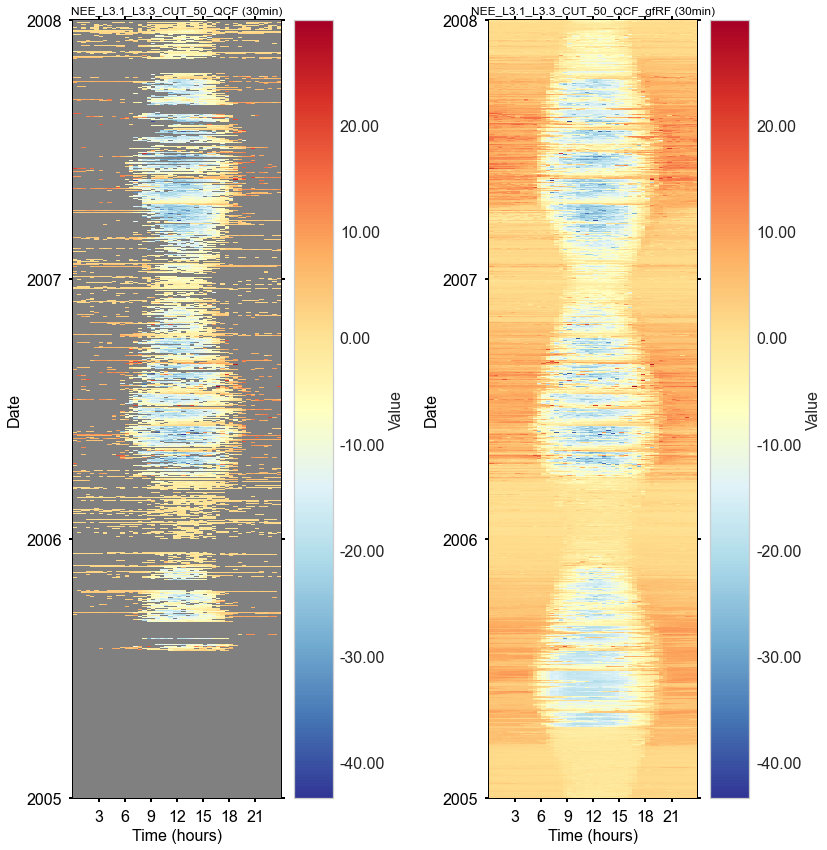

In [47]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from diive.core.plotting.heatmap_datetime import HeatmapDateTime

fig = plt.figure(facecolor='white', figsize=(10, 12), dpi=72)
gs = gridspec.GridSpec(1, 2)  # rows, cols
gs.update(wspace=0.6, hspace=0.1, left=0.03, right=0.97, top=0.95, bottom=0.05)
ax1 = ax_series = fig.add_subplot(gs[0, 0])
ax2 = ax_series = fig.add_subplot(gs[0, 1])
HeatmapDateTime(series=res['NEE_L3.1_L3.3_CUT_50_QCF'], ax=ax1).plot()
HeatmapDateTime(series=res['NEE_L3.1_L3.3_CUT_50_QCF_gfRF'], ax=ax2).plot()

In [53]:
locs = res.index.year == 2005
res.loc[locs, 'NEE_L3.1_L3.3_CUT_50_QCF_gfRF'].multiply(0.02161926).cumsum()

TIMESTAMP_MIDDLE
2005-01-01 00:15:00      0.036141
2005-01-01 00:45:00      0.072298
2005-01-01 01:15:00      0.107957
2005-01-01 01:45:00      0.143785
2005-01-01 02:15:00      0.178864
                          ...    
2005-12-31 21:45:00   -185.070484
2005-12-31 22:15:00   -185.043011
2005-12-31 22:45:00   -185.012329
2005-12-31 23:15:00   -184.986896
2005-12-31 23:45:00   -184.952701
Freq: 30min, Name: NEE_L3.1_L3.3_CUT_50_QCF_gfRF, Length: 17520, dtype: float64